### Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab or click on this link https://www.kaggle.com/general/156610

In [1]:
# Installing the Kaggle API in Colab
!pip install -q kaggle

In [2]:
#creating a kaggle folder
!mkdir ~/.kaggle/

In [3]:
#Connecting in the google driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !rm -r ~/.kaggle/

In [4]:
#Copy the file kaggle.json, which is the API for kaggle, into the kaggle folder we created
!cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [5]:
#Give access right to kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#To list the kaggle competition
! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                   Data Science Job Salaries                    7KB  2022-06-15 08:59:12          18951        590  1.0              
jpmiller/employee-attrition-for-healthcare           Employee Attrition for Healthcare           59KB  2022-08-10 22:34:29            357         24  0.9705882        
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52            926         71  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex      Life Expectancy in Europe by Age and Sex     4MB  2022-08-12 15:28:01            387         23  1.0       

In [7]:
# !kaggle datasets download -d /competitions/paddy-disease-classification

#To download the dataset of the competition, for us it is: paddy-disease-classification
!kaggle competitions download -c paddy-disease-classification

 98% 1.00G/1.02G [00:03<00:00, 241MB/s]
100% 1.02G/1.02G [00:03<00:00, 290MB/s]


In [8]:
#To unzip the dataset downloaded
!unzip -q paddy-disease-classification.zip

### To install Pytorch Image Models (timm) : https://github.com/rwightman/pytorch-image-models

In [9]:
!pip install fastai timm -Uqq

     |████████████████████████████████| 509 kB 35.3 MB/s 


In [10]:
# import timm
from fastai.vision.all import *

The vision module of the fastai library contains all the necessary functions to define a Dataset and train a model for computer vision tasks. 
It contains four different submodules to reach that goal (https://fastai1.fast.ai/vision.html) : 
- vision.image
- vision.transform
- vision.data 
- vision.learner 

In [11]:
set_seed(2022)

In [12]:
df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [13]:
df_train.label.value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

In [14]:
df_train.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

### Histogram to visualize the frequency​ distribution of the data

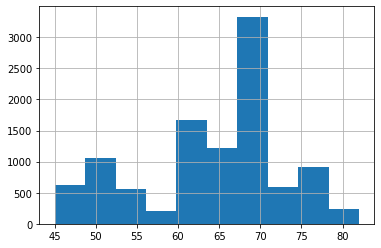

In [15]:
df_train.age.hist()

In [16]:
#len of the train image
files = get_image_files("train_images")
len(files)

10407

In [17]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(),
    item_tfms=Resize(256),
    batch_tfms=[
        *aug_transforms(size=(224,224)), 
        Normalize.from_stats(*imagenet_stats)
    ]
)

dls = dblock.dataloaders("train_images", bs=128)

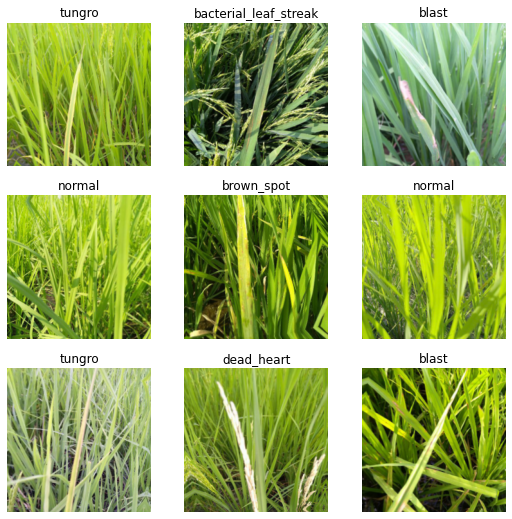

In [18]:
dls.show_batch()

##Model

In [20]:
# timm.list_models("convnext*")

In [21]:
#model1 : convnext_small_in22k () -> Score :0.97616
#model2:convnext_small_384_in22ft1k() -> Score : 0.98231
#Simple conv- adam,  epochs - 5, kaggle score - 0.62245, lr=0.001
#convnext_small -> Score: 0.97231

In [22]:
learn = vision_learner(
    dls,
    "convnext_small",
    metrics=accuracy,
    cbs=[
        EarlyStoppingCallback(patience=3),
        SaveModelCallback()
    ]
).to_fp16()

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_1k_224_ema.pth


In [23]:
learn.fine_tune(40, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,2.465824,1.360540,0.555502,01:39
1,1.762625,0.854764,0.728015,01:35
2,1.285794,0.644110,0.793849,01:36
3,0.985985,0.535904,0.831331,01:35
4,0.777122,0.436251,0.856800,01:37


Better model found at epoch 0 with valid_loss value: 1.3605399131774902.
Better model found at epoch 1 with valid_loss value: 0.854763925075531.
Better model found at epoch 2 with valid_loss value: 0.6441103219985962.
Better model found at epoch 3 with valid_loss value: 0.535903811454773.
Better model found at epoch 4 with valid_loss value: 0.4362509250640869.


epoch,train_loss,valid_loss,accuracy,time
0,0.576393,0.367446,0.881307,01:44
1,0.521492,0.342994,0.889476,01:43
2,0.485913,0.319937,0.901009,01:42
3,0.445384,0.295997,0.910139,01:40
4,0.406756,0.272521,0.912542,01:41
5,0.368687,0.259952,0.915425,01:42
6,0.331906,0.245092,0.926478,01:43
7,0.298125,0.238677,0.926478,01:42
8,0.286169,0.210437,0.934647,01:40
9,0.260122,0.192387,0.944738,01:42


Better model found at epoch 0 with valid_loss value: 0.36744579672813416.
Better model found at epoch 1 with valid_loss value: 0.34299400448799133.
Better model found at epoch 2 with valid_loss value: 0.31993722915649414.
Better model found at epoch 3 with valid_loss value: 0.29599684476852417.
Better model found at epoch 4 with valid_loss value: 0.27252140641212463.
Better model found at epoch 5 with valid_loss value: 0.2599523961544037.
Better model found at epoch 6 with valid_loss value: 0.24509204924106598.
Better model found at epoch 7 with valid_loss value: 0.2386772185564041.
Better model found at epoch 8 with valid_loss value: 0.2104373723268509.
Better model found at epoch 9 with valid_loss value: 0.19238710403442383.
Better model found at epoch 12 with valid_loss value: 0.18537957966327667.
Better model found at epoch 13 with valid_loss value: 0.17035795748233795.
Better model found at epoch 14 with valid_loss value: 0.16327817738056183.
Better model found at epoch 15 with va

In [24]:
learn.export("model.pth")

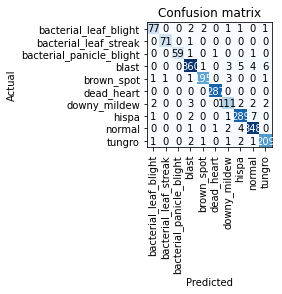

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


### Submitting the submission.csv file

In [26]:
test_df = pd.read_csv("sample_submission.csv")
test_df.head()

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN


In [27]:
test_image_filepaths = (
    test_df["image_id"]
        .apply(lambda image_name: "/content/test_images/"+image_name)
        .values
        .tolist()
)
test_image_filepaths[:5]

['/content/test_images/200001.jpg',
 '/content/test_images/200002.jpg',
 '/content/test_images/200003.jpg',
 '/content/test_images/200004.jpg',
 '/content/test_images/200005.jpg']

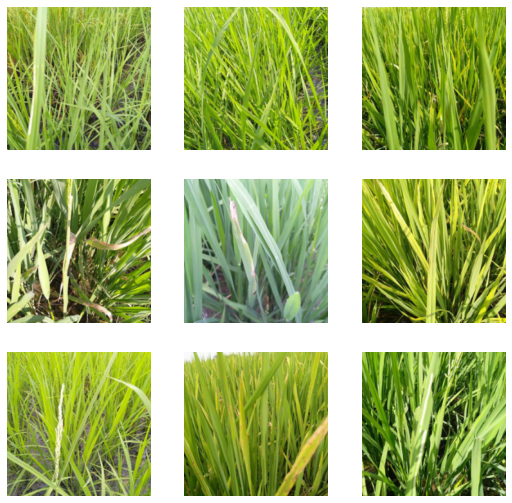

In [28]:
test_dl = learn.dls.test_dl(test_image_filepaths)
test_dl.show_batch()

In [29]:
preds, _ = learn.get_preds(dl=test_dl)
preds[:5]

TensorBase([[5.1919e-06, 1.2190e-08, 1.6296e-06, 7.1262e-07, 1.1033e-05,
             1.0930e-06, 8.9121e-07, 9.9998e-01, 1.3249e-06, 2.0762e-06],
            [5.1318e-07, 1.1046e-06, 2.3819e-07, 1.0468e-06, 1.4905e-07,
             1.6529e-08, 1.0550e-06, 2.0343e-04, 9.9979e-01, 2.5371e-06],
            [6.6790e-07, 7.9005e-07, 6.2752e-06, 9.9962e-01, 2.9825e-04,
             6.9701e-09, 5.3735e-05, 6.6539e-06, 1.8136e-05, 1.9061e-07],
            [3.0920e-04, 4.6629e-06, 3.0106e-06, 9.9757e-01, 1.2462e-04,
             4.6812e-06, 1.0288e-03, 2.2159e-05, 1.7661e-07, 9.3124e-04],
            [1.6729e-05, 1.5305e-06, 1.2493e-05, 9.9873e-01, 2.6042e-04,
             5.8686e-04, 3.7743e-04, 6.6741e-06, 3.4288e-06, 6.0051e-07]])

In [30]:
results = np.argmax(preds, axis=1)
results[:5]

TensorBase([7, 8, 3, 3, 3])

In [31]:
dls.vocab[results[:5]]

(#5) ['hispa','normal','blast','blast','blast']

In [32]:
test_df["label"] = dls.vocab[results]
test_df.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [33]:
test_df.to_csv("submission.csv", index=None)